In [88]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Load the Dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Data sets\german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [90]:
# Understanding the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [91]:
# Removing Unnecessary Unamed 0 column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [92]:
# Checking for Missing values
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [93]:
# Filling savings account and checking amount missing values
df["Saving accounts"]=df["Saving accounts"].fillna("unknown")
df["Checking account"]=df["Checking account"].fillna("unknown")

In [94]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [95]:
# Checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [96]:
# Risk is the Targeted column so checking for value counts
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [97]:
df_dashboard=df.copy()

In [98]:
df_dashboard.to_csv("credit_risk_dashboard.csv", index=False)

In [99]:
# Changing Risk values with numbers because for ML
df["Risk"]=df["Risk"].map({"good":1,"bad":0})

In [100]:
## EDA 

In [101]:
df.groupby("Risk")["Credit amount"].mean().reset_index()

## Bad Customer are taking higher amount 

,Risk,Credit amount
0,0,3938.126667
1,1,2985.457143


In [102]:
df.groupby("Risk")["Duration"].mean().reset_index()

## Bad customers take longer to repay loans.    Longer duration = higher risk.

,Risk,Duration
0,0,24.860000
1,1,19.207143


###### Bad customers take longer to repay loans.    Longer duration = higher risk.

In [103]:
df.groupby("Risk")["Age"].mean().reset_index()

,Risk,Age
0,0,33.963333
1,1,36.224286


###### Younger customers are slightly riskier.Older customers are safer.This is logical because older people usually have stable income

In [104]:
pd.crosstab(df["Housing"], df["Risk"])

Risk,0,1
Housing,,
free,44,64
own,186,527
rent,70,109


###### People who own houses are safer. People who rent have higher risk. This makes sense because house ownership shows financial stability.

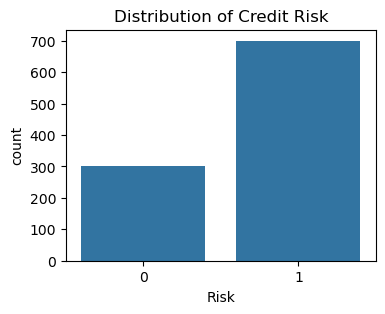

In [105]:
plt.figure(figsize=(4,3))
sns.countplot(x="Risk", data=df)
plt.title("Distribution of Credit Risk")
plt.show()

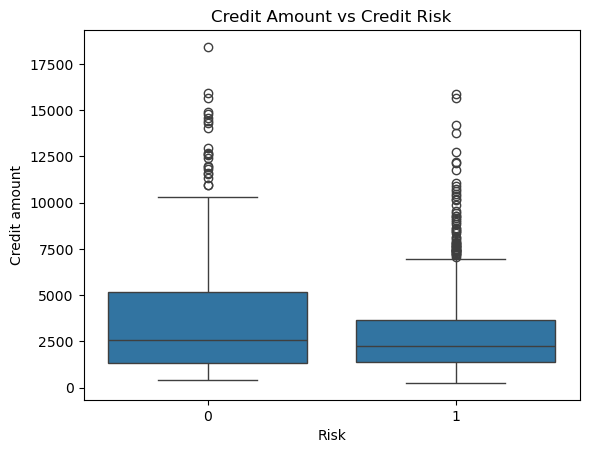

In [106]:
sns.boxplot(x="Risk", y="Credit amount", data=df)
plt.title("Credit Amount vs Credit Risk")
plt.show()

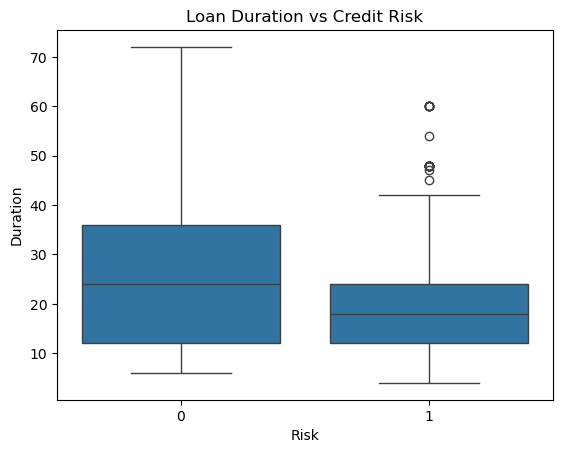

In [107]:
sns.boxplot(x="Risk", y="Duration", data=df)
plt.title("Loan Duration vs Credit Risk")
plt.show()

In [108]:
# Encoding

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [110]:
df["Sex"] = le.fit_transform(df["Sex"])
df["Housing"] = le.fit_transform(df["Housing"])
df["Saving accounts"] = le.fit_transform(df["Saving accounts"])
df["Checking account"] = le.fit_transform(df["Checking account"])
df["Purpose"] = le.fit_transform(df["Purpose"])

In [111]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


### Target column
x= Risk

### Feauture Selection
y=Age,
Sex,
Housing,
Credit amount,
Duration,
Purpose

In [112]:
x=df.drop("Risk",axis=1)
y=df["Risk"]

In [113]:
## Train test split
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [115]:
print(x_train.shape)
print(x_test.shape)

(800, 9)
(200, 9)


In [116]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [117]:
y_pred = model.predict(x_test)
y_pred[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [118]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.77


In [119]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 25  34]
 [ 12 129]]


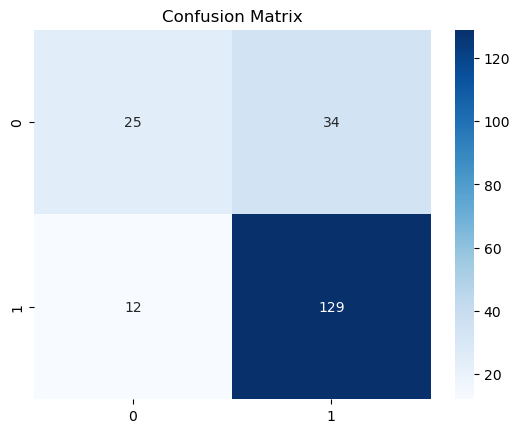

In [120]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [121]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.68      0.42      0.52        59
           1       0.79      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.76      0.77      0.75       200



In [122]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.755


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


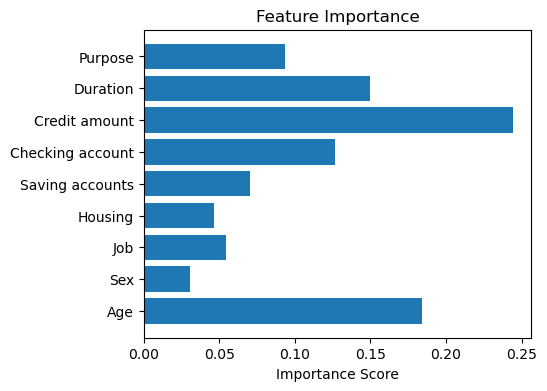

In [123]:
importance = model.feature_importances_

plt.figure(figsize=(5,4))
plt.barh(x.columns, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [124]:
new_customer = [[35, 1, 2, 1, 2, 1, 5000, 24, 3]]

In [125]:
prediction = model.predict(new_customer)

print(prediction)

[1]


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [126]:
if prediction[0] == 1:
    print("Customer is Good Risk")
else:
    print("Customer is Bad Risk")

Customer is Good Risk


In [127]:
df.to_csv("credit_risk_cleaned.csv",index=False)